# Integrative Task 3 

## Andrés Arango
## ["nn"]

#### Import of libraries for the project

In [34]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_da

#### Amazon database aggregation

In [3]:
df_amazon = pd.read_csv(r"sentiment labelled sentences\amazon_cells_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [4]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### Imbd database aggregation

In [13]:
df_imbd = pd.read_csv(r"sentiment labelled sentences\imdb.txt",sep="\t",header=None,names=['sentence','target'])


In [14]:
df_imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  748 non-null    object
 1   target    748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


#### Imdb database aggregation

In [15]:
df_yelp = pd.read_csv(r"sentiment labelled sentences\yelp_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [16]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### Data from all the databases

Text(0.5, 1.0, 'Data from each of the databases')

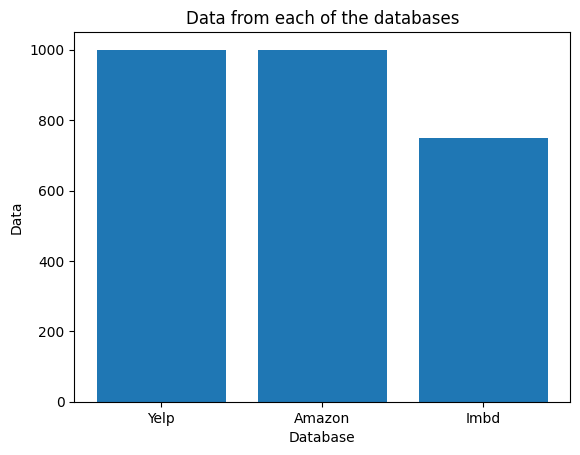

In [23]:

plt.bar(["Yelp","Amazon","Imbd"],[df_yelp.shape[0],df_amazon.shape[0],df_imbd.shape[0]])
plt.ylabel("Data")
plt.xlabel("Database")
plt.title("Data from each of the databases")

In [24]:
df_sub1 = df_amazon.append(df_imbd,ignore_index=True)
df= df_sub1.append(df_yelp,ignore_index=True)

#### Database for the project, has 2 columns and 2748 sentences all with a result between 0 and 1 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2748 non-null   object
 1   target    2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


#### Database display

In [26]:
df.head()

,sentence,target
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [44]:
df.describe()

,target
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#### True and false classification

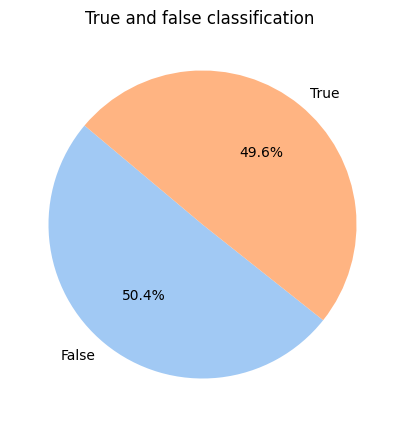

In [27]:
conteo =df["target"].value_counts()
plt.figure(figsize=(15,5))
plt.pie(conteo, labels=["False","True"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("True and false classification ")
plt.show()

#### Tokemnization of sentences, tokemnizes the words by dividing them into lists, converts all tokems to lower case, removes empty words, reduces words (becomes lemmas) and reconstructs sentences, returning them

In [21]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    # Pase el texto a minúscula
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

#### The tokemnization function is applied to the database. 

In [22]:
df['sentence'] = df['sentence'].apply(preprocess_text)

#### Database after tokemnization of the sentences 

In [23]:
df.head()

,sentence,target
0,way plug u unless go converter .,0
1,"good case , excellent value .",1
2,great jawbone .,1
3,tied charger conversation lasting 45 minutes.m...,0
4,mic great .,1


#### Division of the database into training and test sets

In [28]:

X = df['sentence']
y = df['target']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, train_size=0.8, shuffle=True)

#### Convert texts into numerical sequences and ensure that all sequences have the same length for the models. 

In [45]:


# Hágale padding a sus secuencias y obtenga aquellas para entrenamiento y aquellas para prueba

max_words = 10000
max_len = 50
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences_train = tok.texts_to_sequences(X_train)
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_train = pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
max_len = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

#### Graphing of token data

 15%|█▌        | 413/2748 [00:00<00:00, 4112.75it/s]

100%|██████████| 2748/2748 [00:00<00:00, 2781.37it/s]


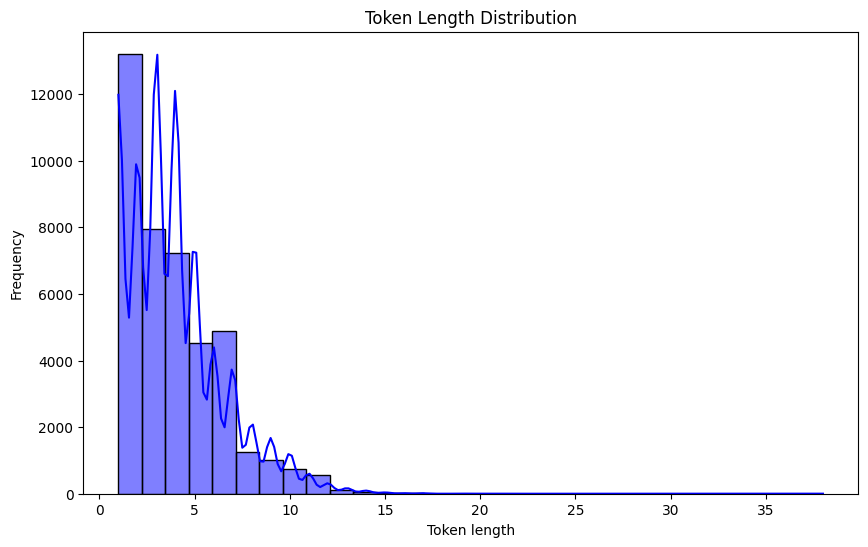

In [37]:
tokens = []
for text in tqdm(df['sentence']):
    tokens.extend(word_tokenize(text))

token_lengths = [len(token) for token in tokens]
token_df = pd.DataFrame({'Longitud del Token': token_lengths})

plt.figure(figsize=(10, 6))
sns.histplot(token_df['Longitud del Token'], bins=30, kde=True, color='blue')
plt.title('Token Length Distribution')
plt.xlabel('Token length')
plt.ylabel('Frequency')
plt.show()

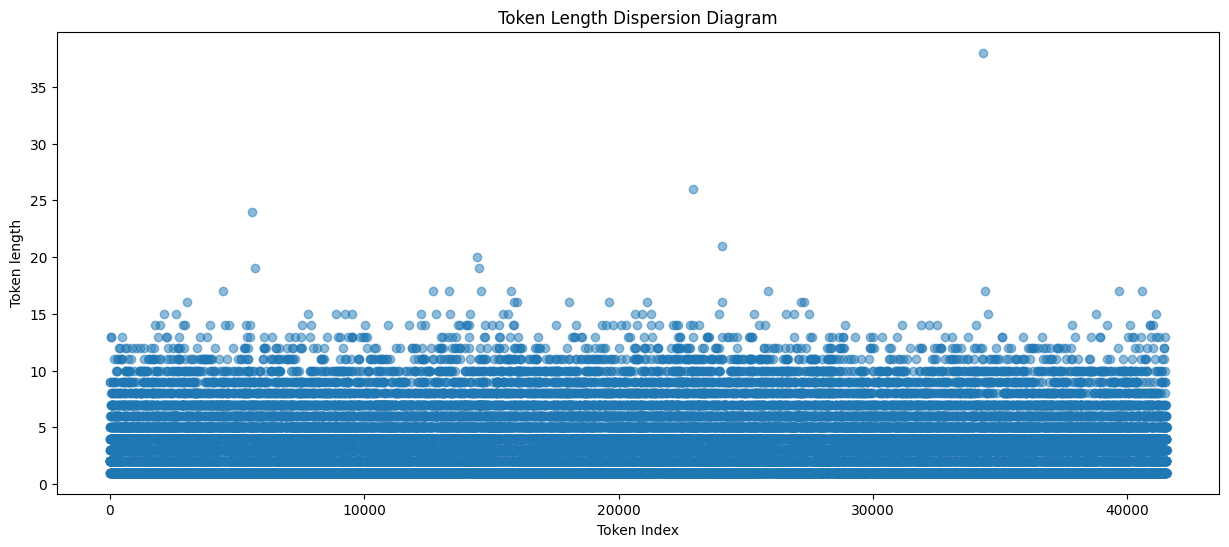

In [39]:
plt.figure(figsize=(15, 6))
plt.scatter(range(len(tokens)), token_lengths, alpha=0.5)
plt.title('Token Length Dispersion Diagram')
plt.xlabel('Token Index')
plt.ylabel('Token length')
plt.show()

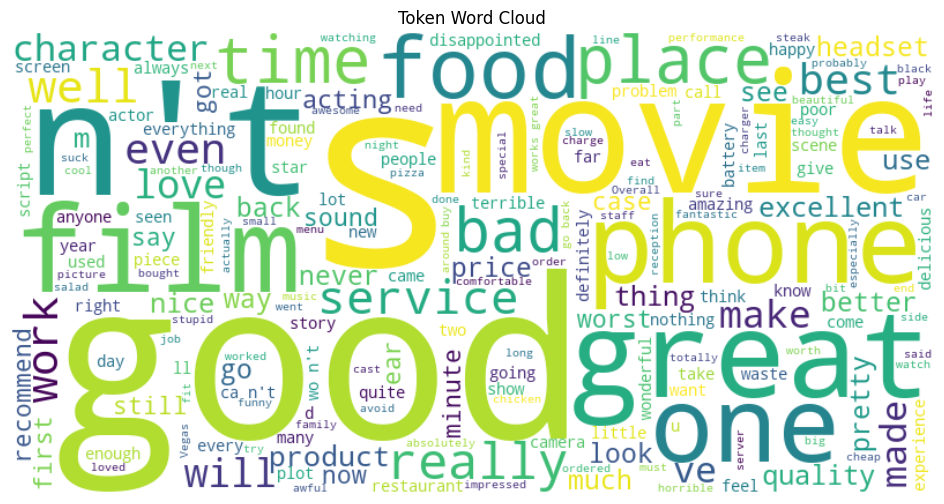

In [42]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Token Word Cloud')
plt.show()

#### Start of DumyClassifier implementation 

In [30]:
dummy_clf = DummyClassifier()
dummy_clf.fit(train_data, y_train)

DummyClassifier()

#### Results of the basic implementation of DummyClassifier

In [32]:
y_pred = dummy_clf.predict(test_data)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recuperación: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')

Exactitud: 0.47
Precisión: 0.22
Recuperación: 0.47
Puntuación F1: 0.30


Text(0.5, 1.0, 'Scores in DummyClassifier')

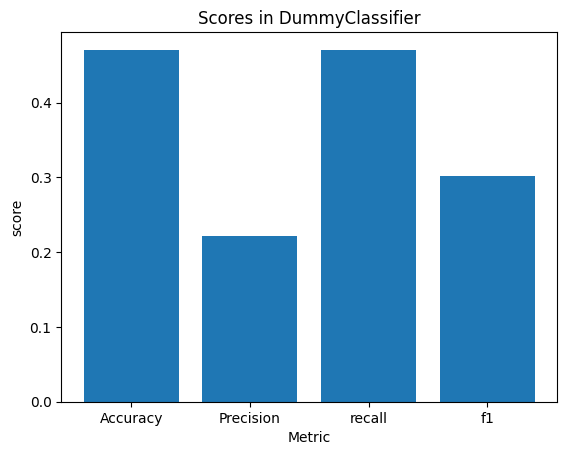

In [33]:
results = [accuracy,precision,recall,f1]
nombre= ["Accuracy","Precision","recall","f1"]
plt.bar(nombre,results)
plt.ylabel("score")
plt.xlabel("Metric")
plt.title("Scores in DummyClassifier")

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(sequences_matrix_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')

In [54]:
from sklearn.model_selection import GridSearchCV

dummy_clf = DummyClassifier()

param_grid = {
    'strategy': ['uniform', 'most_frequent', 'stratified', 'constant'],
    'constant': [0, 1, 2]  
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(dummy_clf, param_grid, cv=5, scoring=scoring_metrics, refit="accuracy")

grid_search.fit(sequences_matrix_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")



Mejores hiperparámetros: {'constant': 0, 'strategy': 'uniform'}


In [55]:
best_dummy = grid_search.best_estimator_
y_pred_best = best_dummy.predict(test_data)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f'Exactitud con mejores hiperparámetros: {accuracy_best:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision_best:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall_best:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1_best:.2f}')

Exactitud con mejores hiperparámetros: 0.50
Precisión con mejores hiperparámetros: 0.50
Recuperación con mejores hiperparámetros: 0.50
Puntuación F1 con mejores hiperparámetros: 0.50


In [63]:
grid_search.best_estimator_

DummyClassifier(constant=0, strategy='uniform')

Scores for each fold are: [0.55454545 0.51818182 0.51818182 0.44545455 0.54545455]
Average score: 0.52


Text(0.5, 1.0, 'Scores for cross validation in Dummy Classifier')

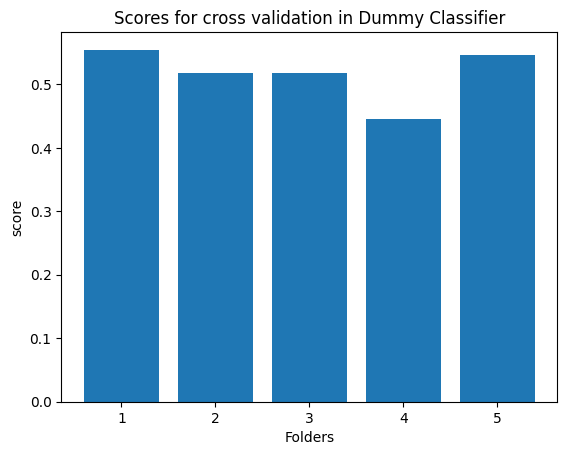

In [82]:
score = cross_val_score(DummyClassifier(constant=0, strategy='uniform'), sequences_matrix_test, y_test, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
plt.bar([1,2,3,4,5],[score[0],score[1],score[2],score[3],score[4]])
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in Dummy Classifier")

<Axes: title={'center': 'DummyClassifier Test Score vs CrossValidationscore'}, xlabel='Training examples', ylabel='Score'>

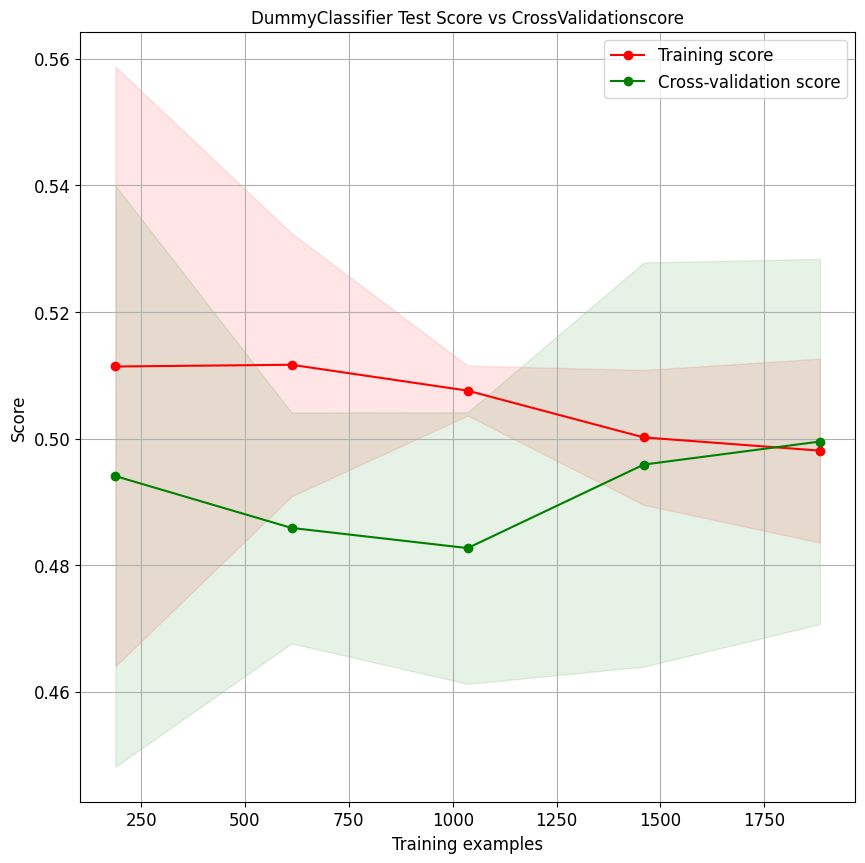

In [96]:
skplt.estimators.plot_learning_curve(DummyClassifier(constant=0, strategy='uniform'), sequences_matrix_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,10), title_fontsize="large", text_fontsize="large",
                                     title="DummyClassifier Test Score vs CrossValidationscore")

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

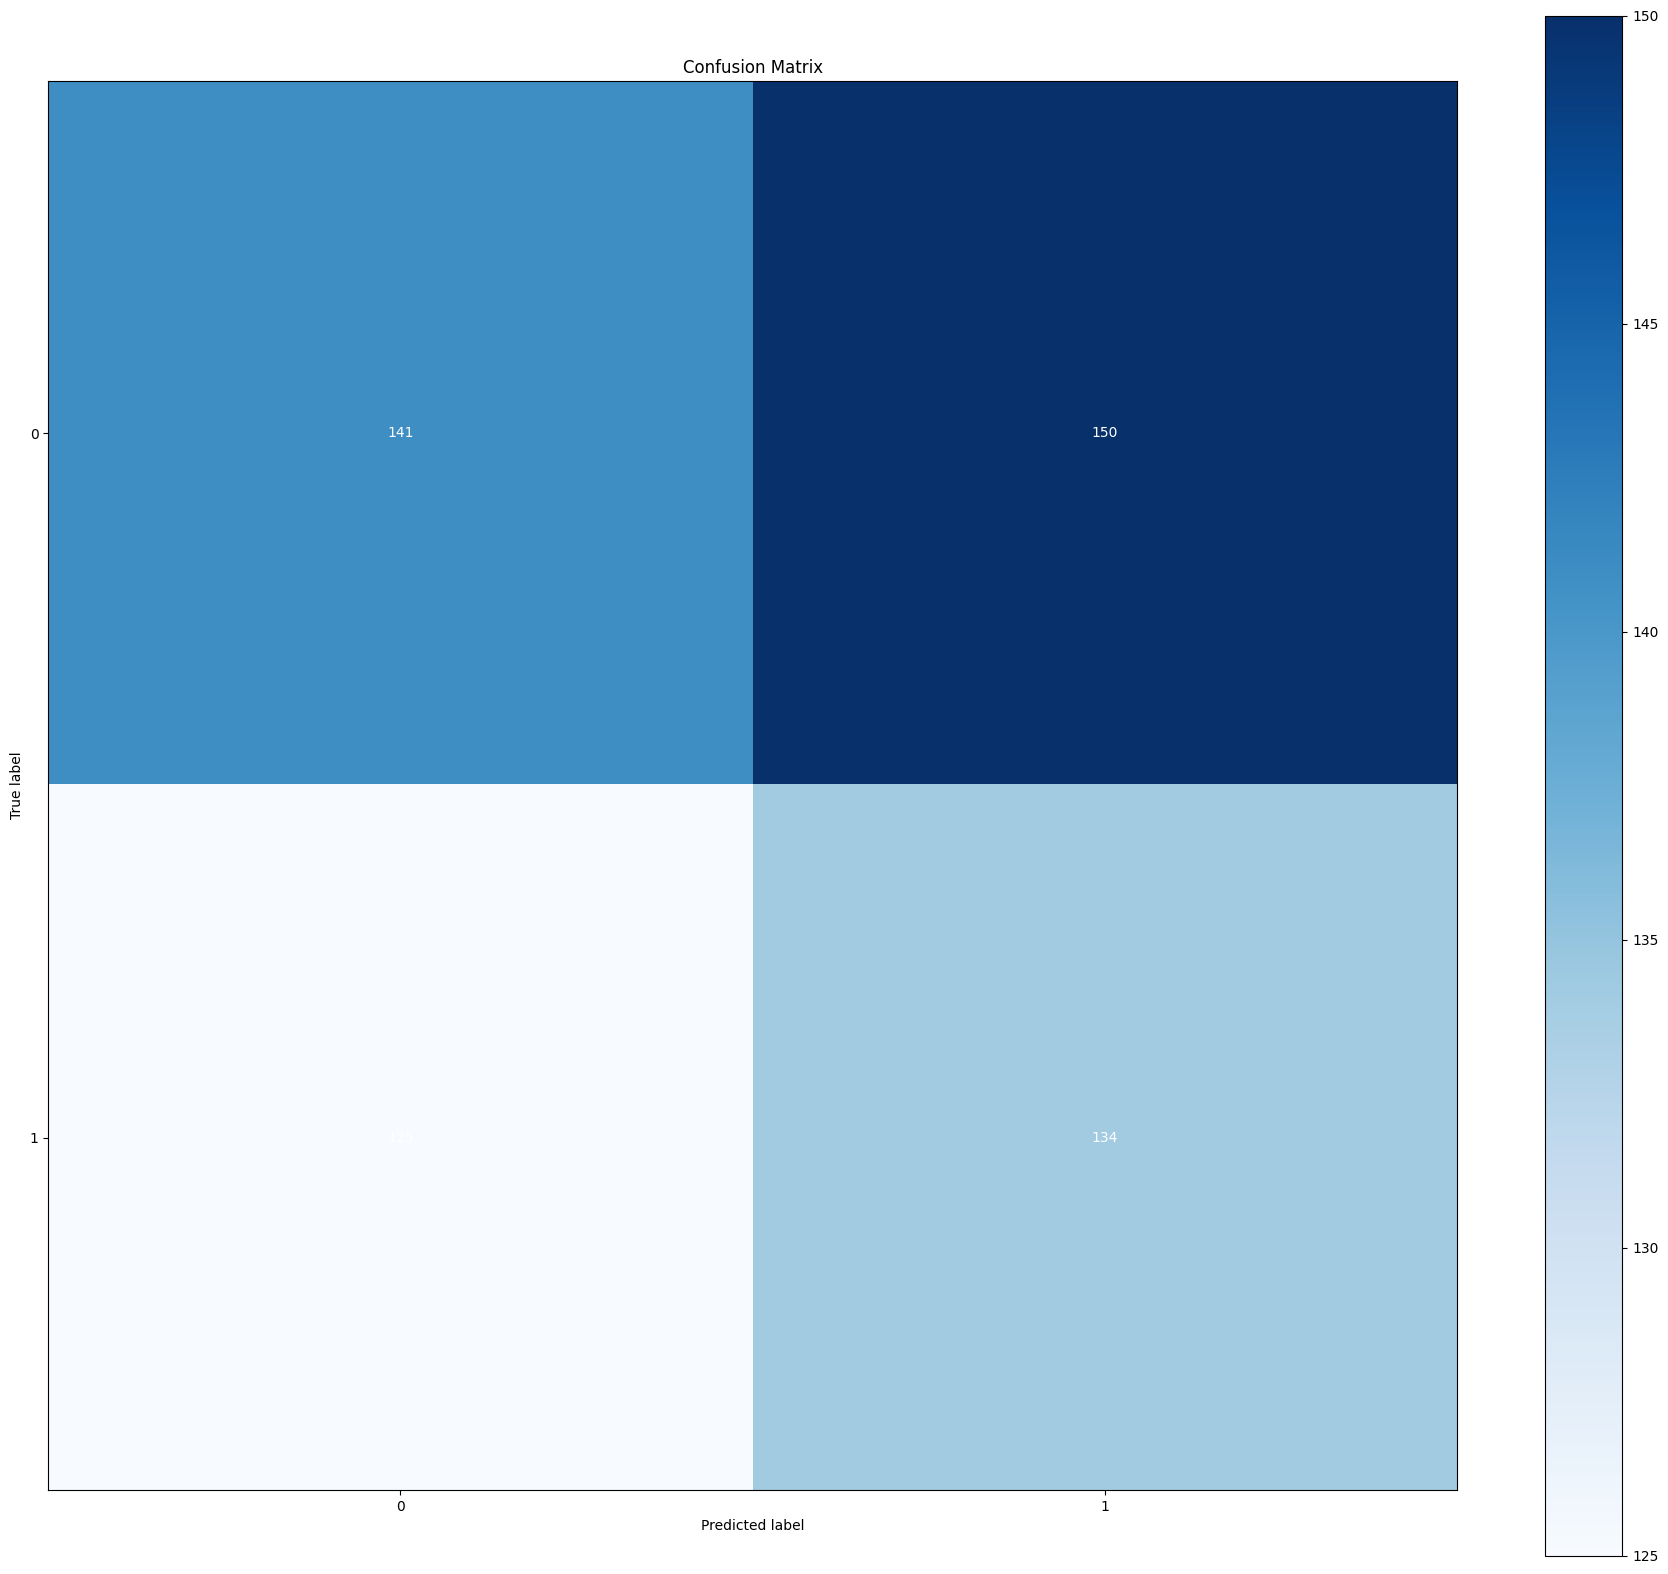

In [101]:
fig = plt.figure(figsize=(50,20))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_best,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

<Axes: title={'center': 'Digits ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

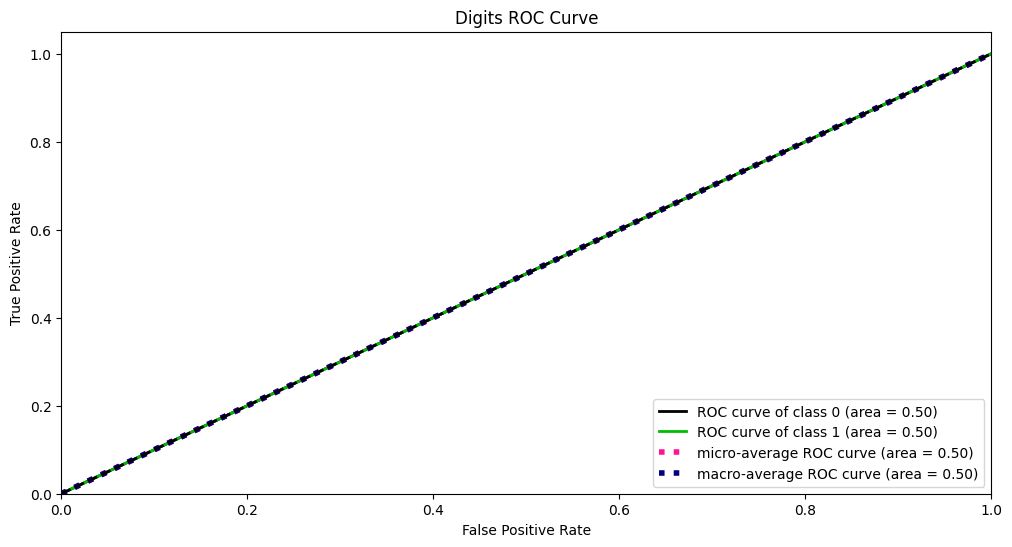

In [104]:
dummy =DummyClassifier(constant=0, strategy='uniform')
dummy.fit(sequences_matrix_train,y_train)
Y_pred = dummy.predict_proba(sequences_matrix_test)
skplt.metrics.plot_roc_curve(y_test,Y_pred,
                       title="Digits ROC Curve", figsize=(12,6))

In [88]:
def create_rnn_model(units=32):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len))
    model.add(SimpleRNN(units=units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

    

In [89]:
rnn_model = create_rnn_model()

In [92]:
rnn_model.fit(train_data, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
28/28 [==============================] - 9s 325ms/step - loss: 0.3248 - accuracy: 0.9272 - val_loss: 0.5583 - val_accuracy: 0.7068
Epoch 2/5
28/28 [==============================] - 9s 331ms/step - loss: 0.2451 - accuracy: 0.9363 - val_loss: 0.7639 - val_accuracy: 0.7205
Epoch 3/5
28/28 [==============================] - 9s 330ms/step - loss: nan - accuracy: 0.9033 - val_loss: nan - val_accuracy: 0.4932
Epoch 4/5
28/28 [==============================] - 9s 326ms/step - loss: nan - accuracy: 0.4858 - val_loss: nan - val_accuracy: 0.4932
Epoch 5/5
28/28 [==============================] - 9s 309ms/step - loss: nan - accuracy: 0.4858 - val_loss: nan - val_accuracy: 0.4932


In [ ]:
def plot_graphs(rnn_model, string):
  plt.plot(rnn_model.rnn_model[string])
  plt.plot(rnn_model.rnn_model['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(rnn_model, "accuracy")
plot_graphs(rnn_model, "loss")

In [105]:
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=32, verbose=0)


In [106]:
param_grid = {
    'units': [50, 100],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(rnn_model, param_grid, cv=5, scoring=scoring_metrics,refit='accuracy')

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(train_data,y_train)

# Imprimir los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

14/14 [==============================] - 2s 106ms/step
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 5, 'units': 50}


In [107]:
best_model = grid_search.best_estimator_

4/4 [==============================] - 1s 63ms/step
Scores for each fold are: [0.55454545 0.48181818 0.47272727 0.59090909 0.6       ]
Average score: 0.54


Text(0.5, 1.0, 'Scores for cross validation in RNN')

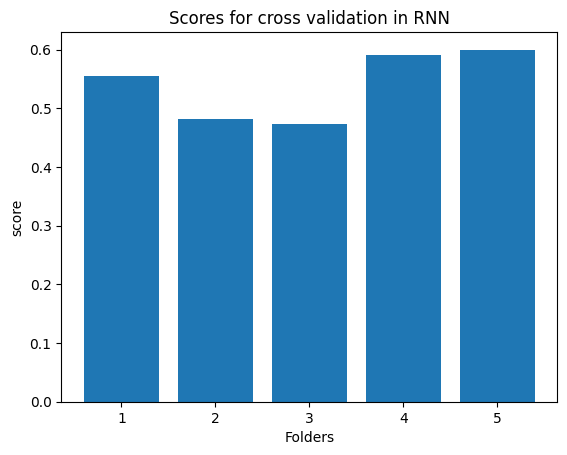

In [116]:
score = cross_val_score(best_model, test_data, y_test, cv= 5, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
plt.bar([1,2,3,4,5],[score[0],score[1],score[2],score[3],score[4]])
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in RNN")

<Axes: title={'center': 'RNN train Score vs CrossValidationscore'}, xlabel='Training examples', ylabel='Score'>

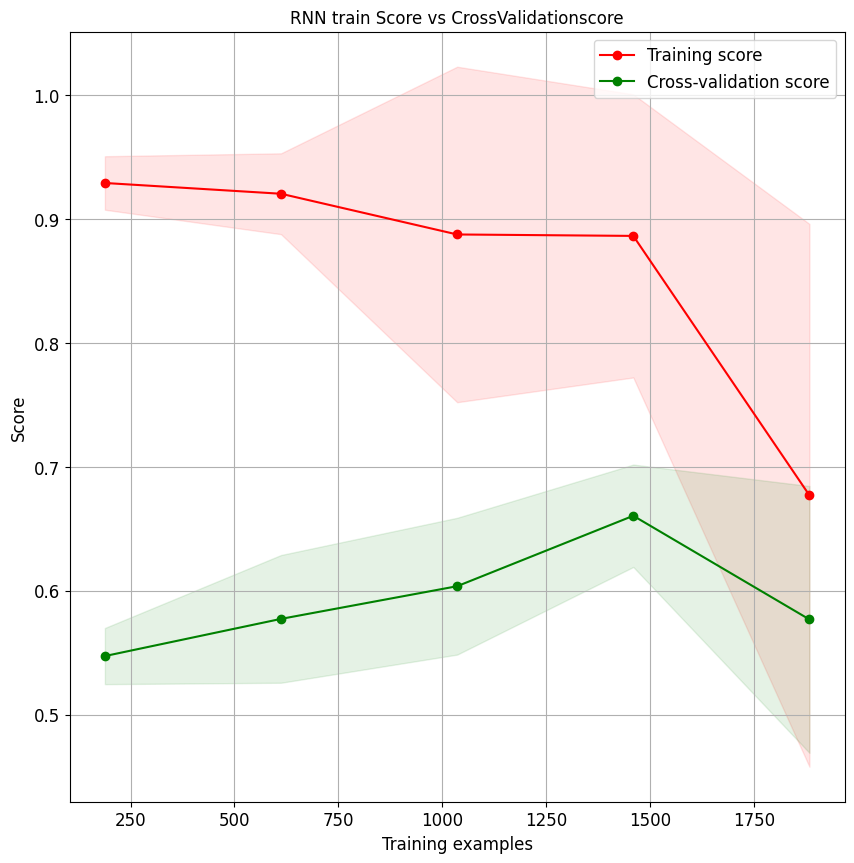

In [109]:
skplt.estimators.plot_learning_curve(best_model, train_data, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,10), title_fontsize="large", text_fontsize="large",
                                     title="RNN train Score vs CrossValidationscore")

In [110]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime los resultados con los mejores hiperparámetros
print(f'Exactitud con mejores hiperparámetros: {accuracy:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1:.2f}')

18/18 [==============================] - 2s 82ms/step
Exactitud con mejores hiperparámetros: 0.74
Precisión con mejores hiperparámetros: 0.69
Recuperación con mejores hiperparámetros: 0.79
Puntuación F1 con mejores hiperparámetros: 0.74


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

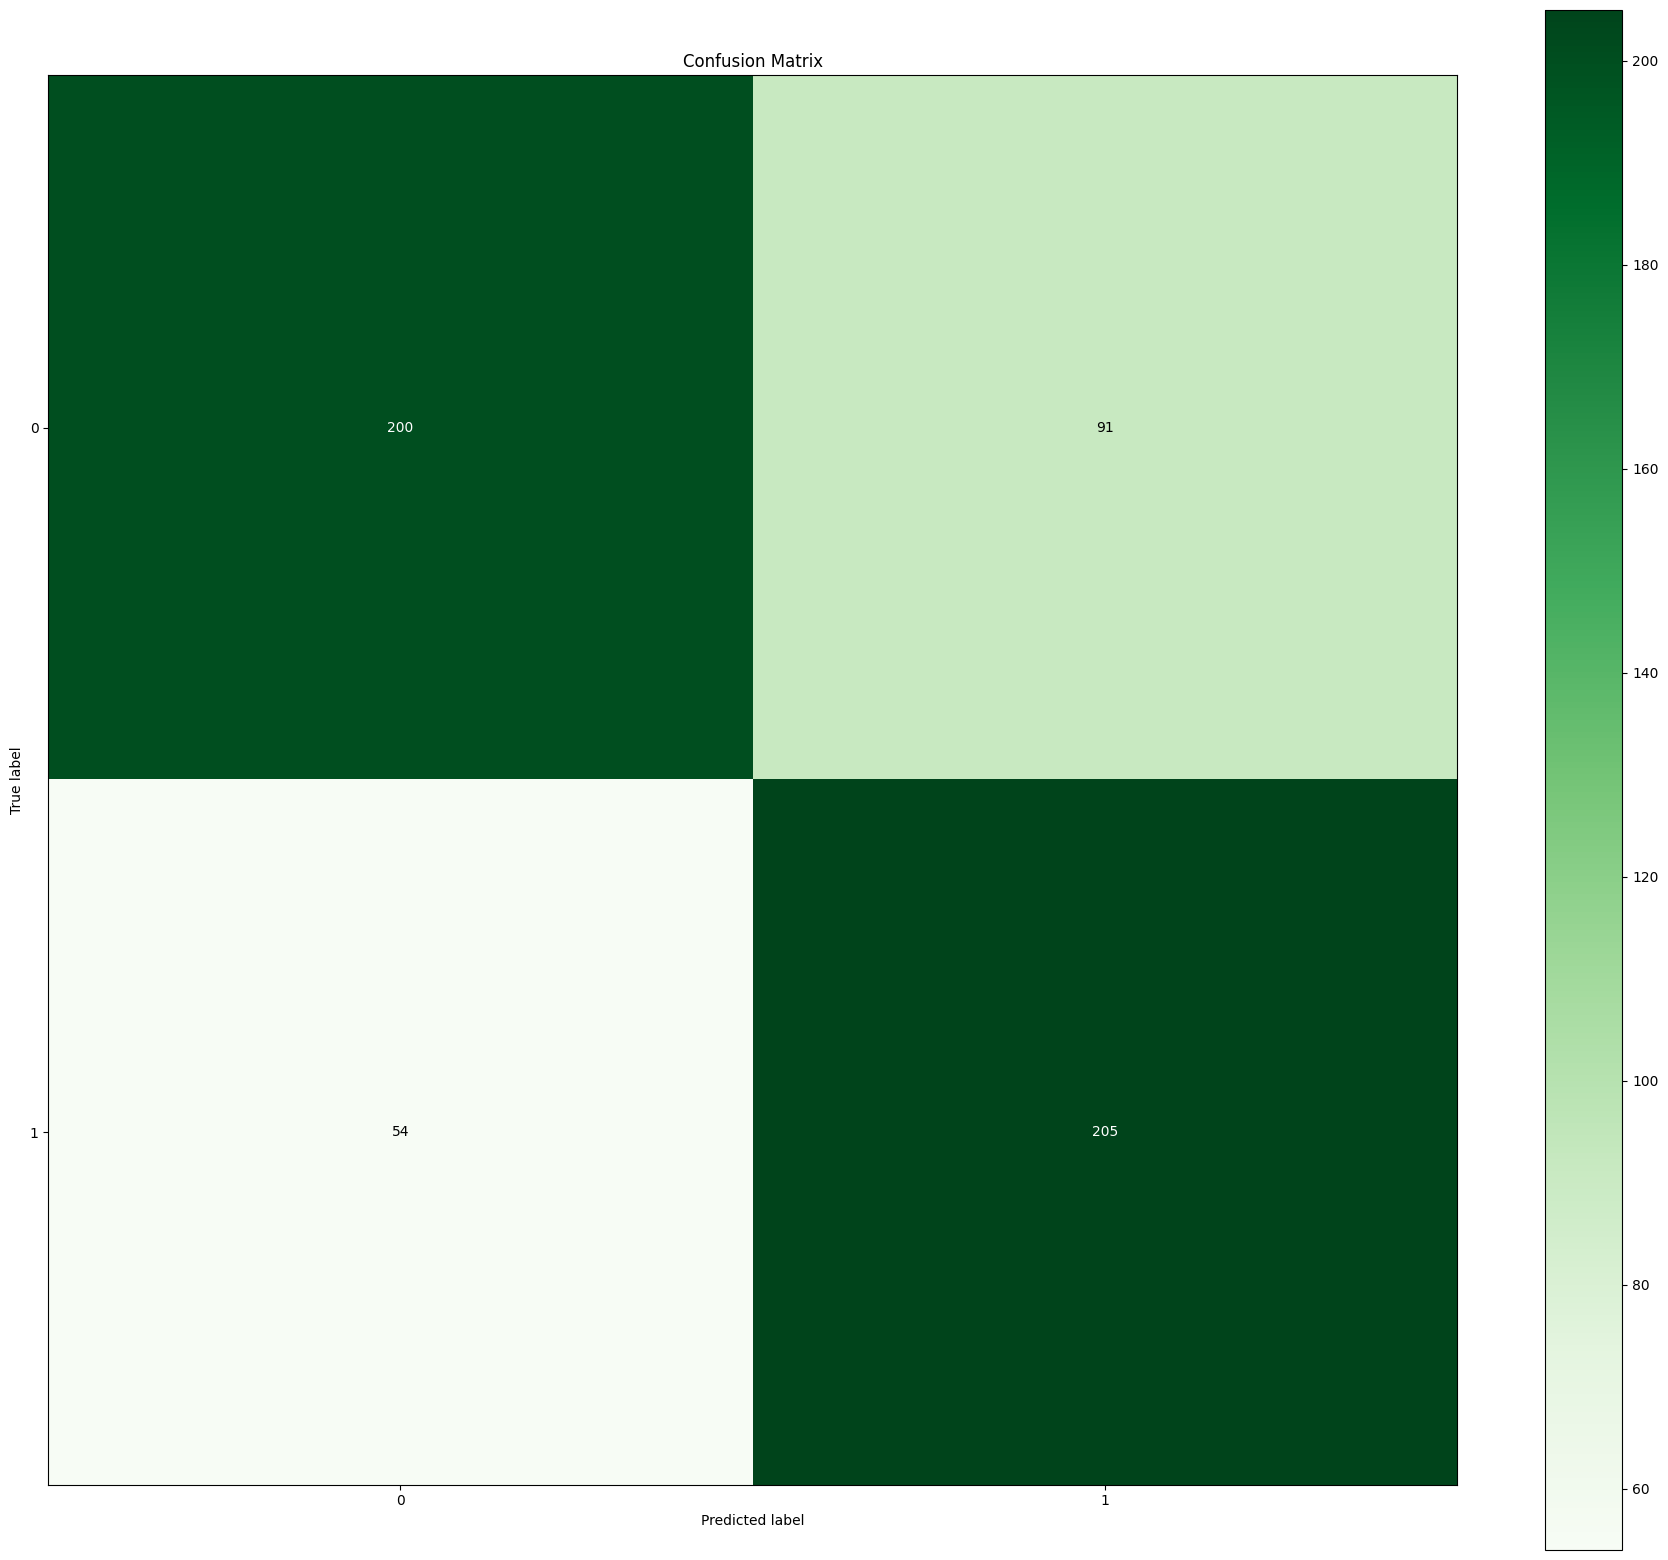

In [112]:
fig = plt.figure(figsize=(50,20))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Greens",
                                    ax=ax1)

18/18 [==============================] - 1s 70ms/step


<Axes: title={'center': 'Digits ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

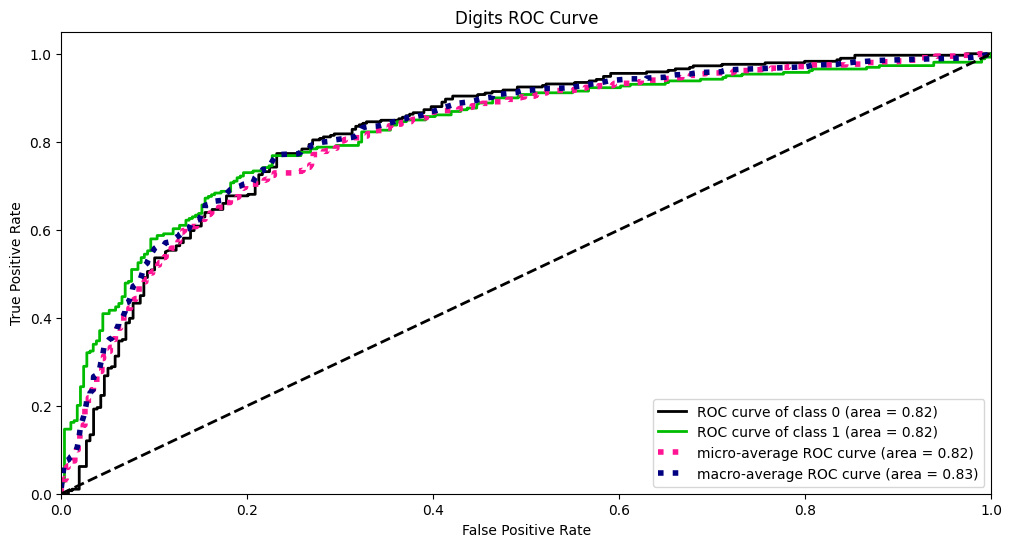

In [113]:

Y_pred = best_model.predict_proba(test_data)
skplt.metrics.plot_roc_curve(y_test,Y_pred,
                       title="Digits ROC Curve", figsize=(12,6))

Text(0.5, 1.0, 'Scores for cross validation in RNN')

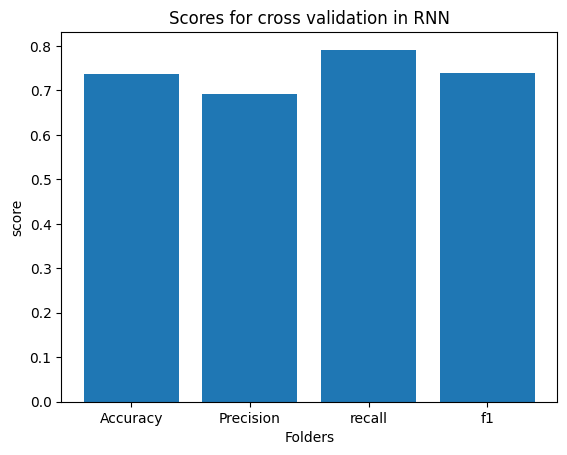

In [118]:
results = [accuracy,precision,recall,f1]
nombre= ["Accuracy","Precision","recall","f1"]
plt.bar(nombre,results)
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in RNN")

In [119]:
def create_lstm_model(units=32):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [120]:
lstm_model = create_lstm_model()

In [121]:
lstm_model.fit(train_data, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
28/28 [==============================] - 20s 499ms/step - loss: 0.6921 - acc: 0.5751 - val_loss: 0.6900 - val_acc: 0.7159
Epoch 2/5
28/28 [==============================] - 13s 466ms/step - loss: 0.6816 - acc: 0.7053 - val_loss: 0.6743 - val_acc: 0.5955
Epoch 3/5
28/28 [==============================] - 13s 472ms/step - loss: nan - acc: 0.6308 - val_loss: nan - val_acc: 0.4932
Epoch 4/5
28/28 [==============================] - 13s 471ms/step - loss: nan - acc: 0.4858 - val_loss: nan - val_acc: 0.4932
Epoch 5/5
28/28 [==============================] - 13s 479ms/step - loss: nan - acc: 0.4858 - val_loss: nan - val_acc: 0.4932


In [122]:
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=32, verbose=0)

In [123]:
param_grid = {
    'units': [50, 100],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(lstm_model, param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(train_data,y_train)

# Imprimir los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

14/14 [==============================] - 6s 361ms/step


KeyboardInterrupt: 

In [36]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime los resultados con los mejores hiperparámetros
print(f'Exactitud con mejores hiperparámetros: {accuracy:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1:.2f}')

69/69 [==============================] - 6s 88ms/step
Exactitud con mejores hiperparámetros: 0.50
Precisión con mejores hiperparámetros: 0.00
Recuperación con mejores hiperparámetros: 0.00
Puntuación F1 con mejores hiperparámetros: 0.00
